In [1]:
import os
os.chdir('/home/reffert/DeepAR_InfluenzaForecast')
from PythonFiles.model import model, preprocessing, split_forecasts_by_week, \
forecast_by_week, train_test_split
from PythonFiles.PlottingFunctions import plot_coverage, print_forecasts_by_week, hyperparameter_boxplots, plot_model_results_by_hp, hp_color_plot
from PythonFiles.Configuration import Configuration
from PythonFiles.HpTuning import get_data, restore_HP_results, objectiveFNN, generate_model_results_by_hp_dict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from ray import tune
config = Configuration()
added_cols = ["model_WIS_mean", "model_WIS_variance", "model_WIS_sd", "model_WIS_median", "model_time_mean", "model_time_variance", "model_time_sd",\
         "model_time_median", "shape"] 
data_splits_dict = get_data(truncate=False, with_features=True, config=config)[0]
train = data_splits_dict["with_features_2001"][0]
test = data_splits_dict["with_features_2001"][1]

# 19.04

In [2]:
df_19_04 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/Hyperparameter_results_19_04.csv", sep=',')
hp_search_space_19_04 = {
    "num_cells": tune.grid_search([10, 20, 40]),
    "num_layers": tune.grid_search([3, 4, 5]),
    "context_length":tune.grid_search([4, 52, 104]),
    "cell_type":tune.grid_search(["lstm", "gru"]),
    "epochs":tune.grid_search([8, 20, 30]),
    #"use_feat_static_real":tune.grid_search([False]),
    #"use_feat_dynamic_real":tune.grid_search([True]),
    "use_feat_static_cat":tune.grid_search([False,True]),
    "cardinality":tune.sample_from(lambda spec:[2]*411 if spec.config.use_feat_static_cat else None),
}
model_results_by_hp_19_04, overall_df_19_04 = generate_model_results_by_hp_dict(df_19_04, hp_search_space_19_04)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                   1620                     324.0


In [3]:
display(overall_df_19_04.sort_values("model_WIS_mean")[added_cols+[col for col in df_19_04.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/cell_type,config/context_length,config/epochs,config/num_cells,config/num_layers,config/use_feat_dynamic_real,config/use_feat_static_cat,config/use_feat_static_real
1320,408.182276,561.166868,23.688961,411.671507,1563.613686,8.441644e+04,290.545074,1410.215639,5.0,lstm,4,20,20,3,True,False,False
358,415.424815,316.296657,17.784731,410.584094,3254.888443,2.944518e+05,542.634159,3000.719796,5.0,lstm,104,30,20,3,True,False,False
1452,416.531303,1047.581881,32.366370,428.638200,2676.716376,6.101573e+05,781.125682,2409.970786,5.0,lstm,4,30,40,5,True,False,False
1355,430.019622,22.987329,4.794510,429.557643,1981.167595,9.180508e+04,302.993526,1874.864101,5.0,gru,104,8,10,4,True,False,False
373,431.010324,566.681571,23.805074,431.170668,2205.624429,1.573857e+05,396.718708,2052.596236,5.0,gru,4,30,40,3,True,False,False
1237,431.292279,878.586657,29.640962,416.445516,2706.240178,4.322555e+05,657.461424,2479.146116,5.0,gru,4,30,40,4,True,True,False
211,432.040654,68.426522,8.272033,432.066893,2526.524783,5.089016e+04,225.588480,2487.625916,5.0,gru,4,30,40,3,True,True,False
1398,432.718312,966.552450,31.089427,426.515837,2446.496337,1.011453e+05,318.033531,2361.888887,5.0,lstm,4,30,40,4,True,False,False
1116,433.447258,359.639029,18.964151,428.101664,1141.800285,2.867098e+04,169.325066,1145.780168,5.0,lstm,4,8,40,5,True,False,False
643,433.627465,1566.715722,39.581760,437.066697,3399.402602,8.631091e+05,929.036635,3496.182849,5.0,gru,4,30,40,5,True,True,False


324
1620


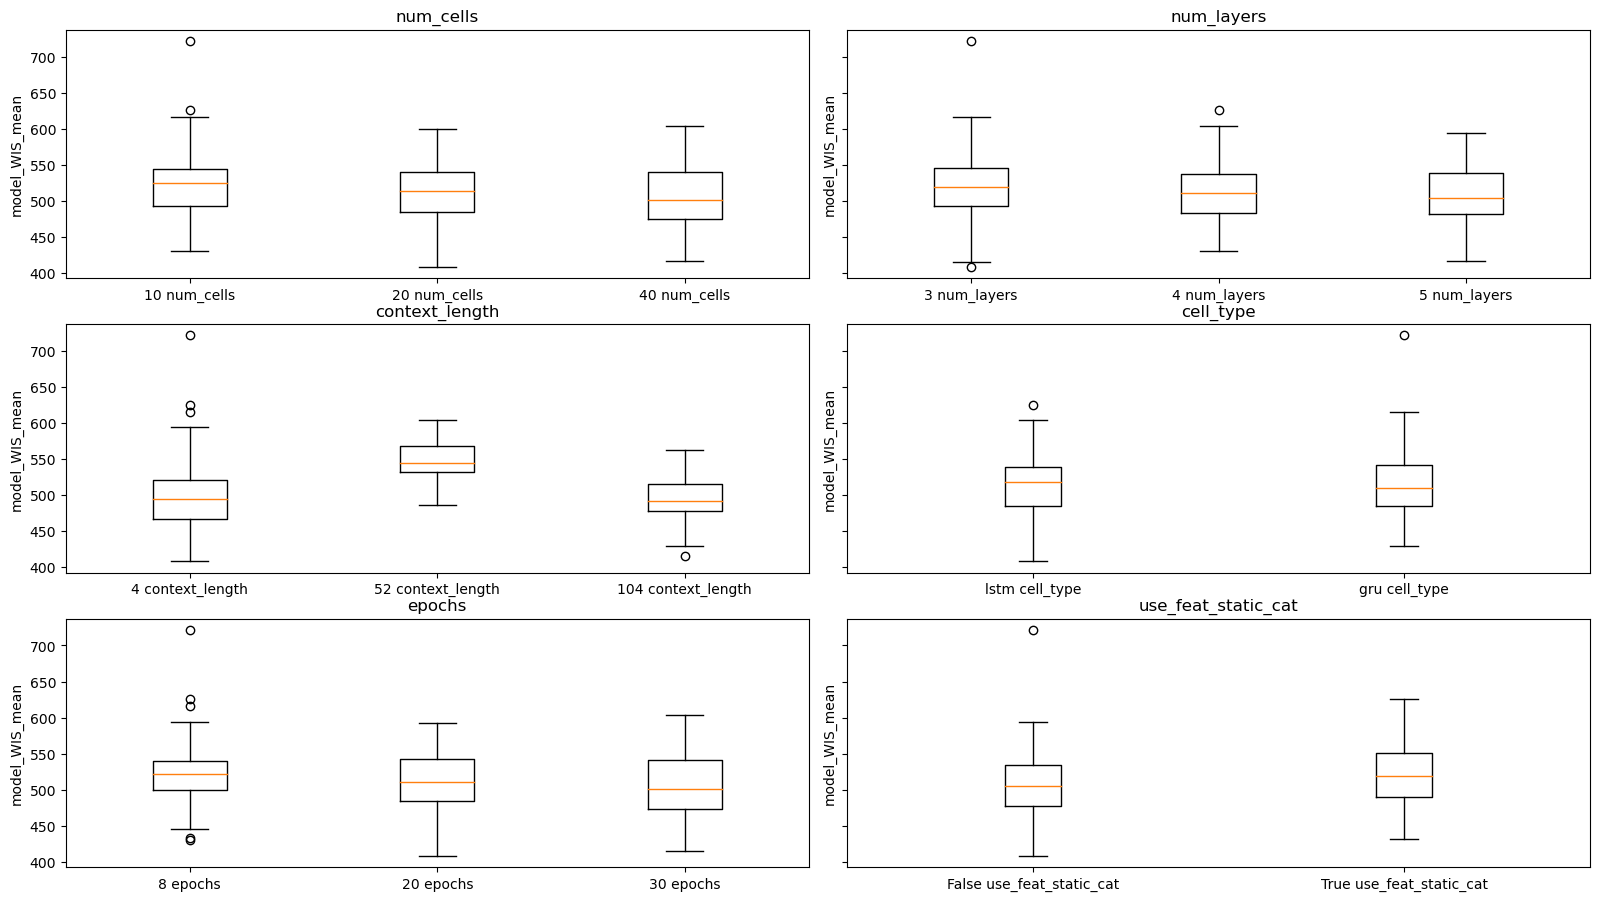

In [4]:
unique_df_19_04 = overall_df_19_04[added_cols+[col for col in df_19_04.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_19_04))
print(len(overall_df_19_04))
#hyperparameter_boxplots(unique_df_27_05, hp_search_space_27_05, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_19_04, hp_search_space_19_04, col="model_WIS_mean")

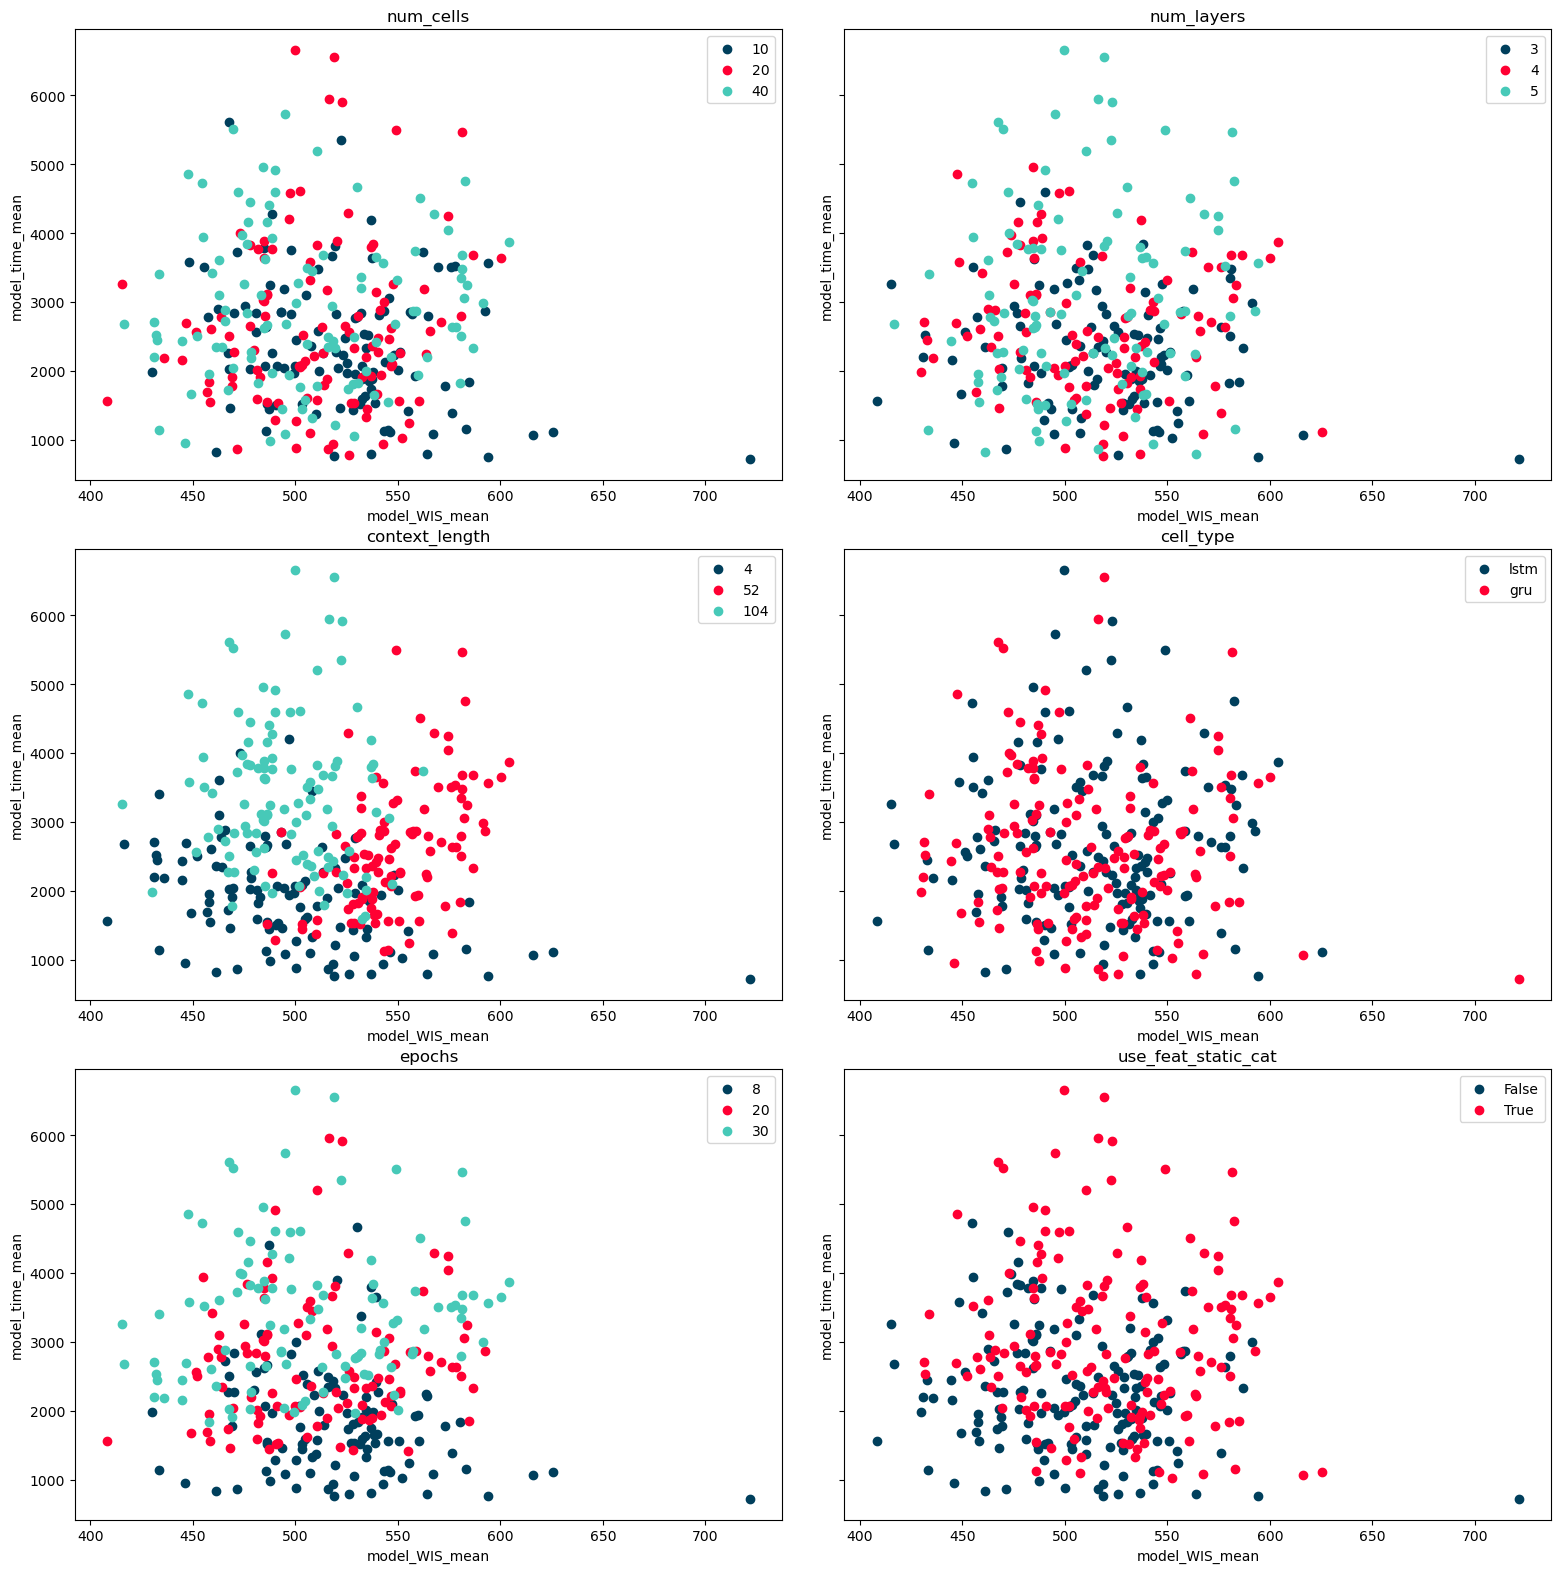

In [5]:
hp_color_plot(config, overall_df_19_04, hp_search_space_19_04, )

# 26_04

In [6]:
df_26_04 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/Restored_Hyperparameter_results_26_04.csv", sep=',')
hp_search_space_26_04 = {
    "num_cells": tune.grid_search([40, 80]),
    "num_layers": tune.grid_search([1, 5, 10]),
    "context_length":tune.grid_search([4, 52, 104]),
    "cell_type":tune.grid_search(["lstm", "gru"]),
    "epochs":tune.grid_search([20, 30, 40]),
    "use_feat_static_real":tune.grid_search([False, False]),
    "use_feat_dynamic_real":tune.grid_search([True, False]),
    "use_feat_static_cat":tune.grid_search([False,True]),
    "cardinality":tune.sample_from(lambda spec:[2]*411 if spec.config.use_feat_static_cat else None),
}
model_results_by_hp_26_04, overall_df_26_04 = generate_model_results_by_hp_dict(df_26_04, hp_search_space_26_04)

There are combinations with fewer modelRuns!!
                           total_modelruns  independent_combinations
modelruns_per_combination                                           
8.0                                   2152                     269.0
7.0                                   1120                     160.0
6.0                                     18                       3.0


In [7]:
display(overall_df_26_04.sort_values("model_WIS_mean")[added_cols+[col for col in df_26_04.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/cell_type,config/context_length,config/epochs,config/num_cells,config/num_layers,config/use_feat_dynamic_real,config/use_feat_static_cat,config/use_feat_static_real
2695,369.005892,326.513613,18.069688,364.282119,4469.863914,1.628010e+06,1275.934773,4002.633383,8.0,gru,4,40,80,10,True,False,False
283,384.197802,440.422277,20.986240,375.178571,5260.048269,1.662310e+07,4077.143983,3322.661935,7.0,gru,4,40,80,5,True,True,False
2908,388.954098,936.067647,30.595223,386.573640,6679.818404,8.422264e+06,2902.113661,5000.167577,7.0,lstm,4,40,80,10,True,True,False
3105,394.685984,1059.291668,32.546761,384.732697,3858.432448,2.046984e+06,1430.728410,2964.358269,8.0,gru,4,40,40,10,True,False,False
3086,400.001388,584.750535,24.181616,396.585497,3918.452896,1.425805e+06,1194.070568,3243.600146,8.0,lstm,4,40,80,5,True,False,False
2902,405.803403,1896.638942,43.550418,389.083125,6413.806462,1.649360e+07,4061.231593,4491.791778,7.0,lstm,4,30,80,10,True,True,False
2461,405.971861,2458.084994,49.579078,388.709506,5256.062853,1.351359e+07,3676.084047,3357.803001,7.0,gru,4,40,40,10,True,True,False
2208,406.422974,1494.439051,38.657975,410.717225,2997.031154,8.903518e+05,943.584526,2571.552455,8.0,lstm,4,40,40,5,True,False,False
2884,406.592609,956.202316,30.922521,408.123749,5067.602754,1.452238e+07,3810.824028,3140.209622,7.0,lstm,4,30,40,10,True,True,False
49,409.852477,670.284012,25.889844,404.525767,2753.331550,7.048177e+05,839.534200,2415.175276,8.0,gru,4,40,40,5,True,False,False


432
3290


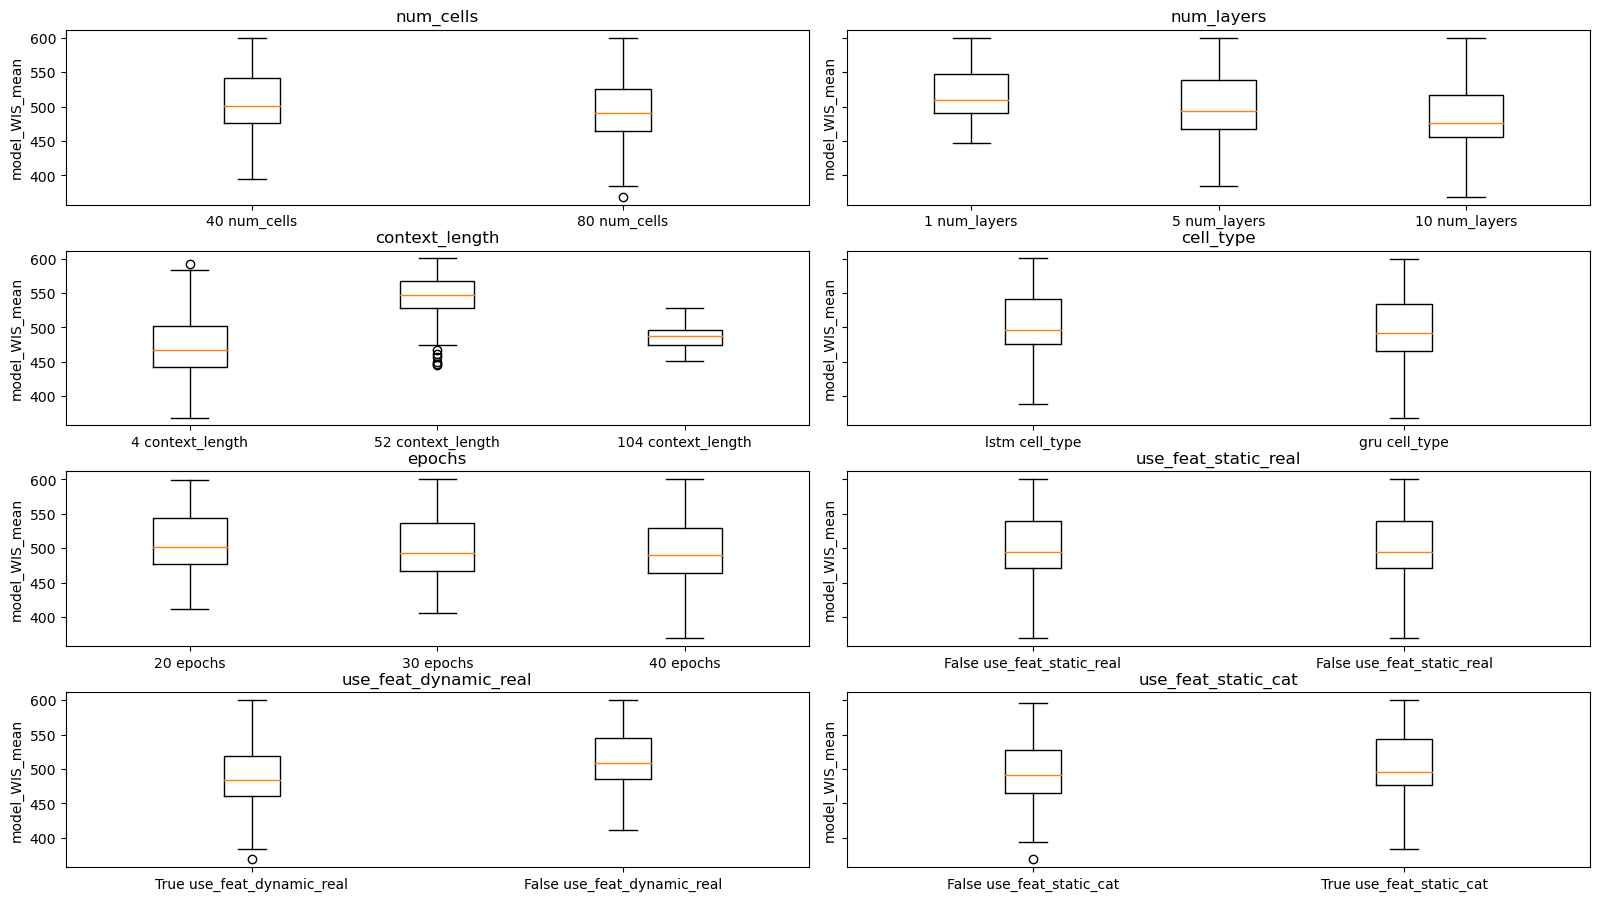

In [8]:
unique_df_26_04 = overall_df_26_04[added_cols+[col for col in df_26_04.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_26_04))
print(len(overall_df_26_04))
#hyperparameter_boxplots(unique_df_26_04, hp_search_space_26_04, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_26_04, hp_search_space_26_04, col="model_WIS_mean")

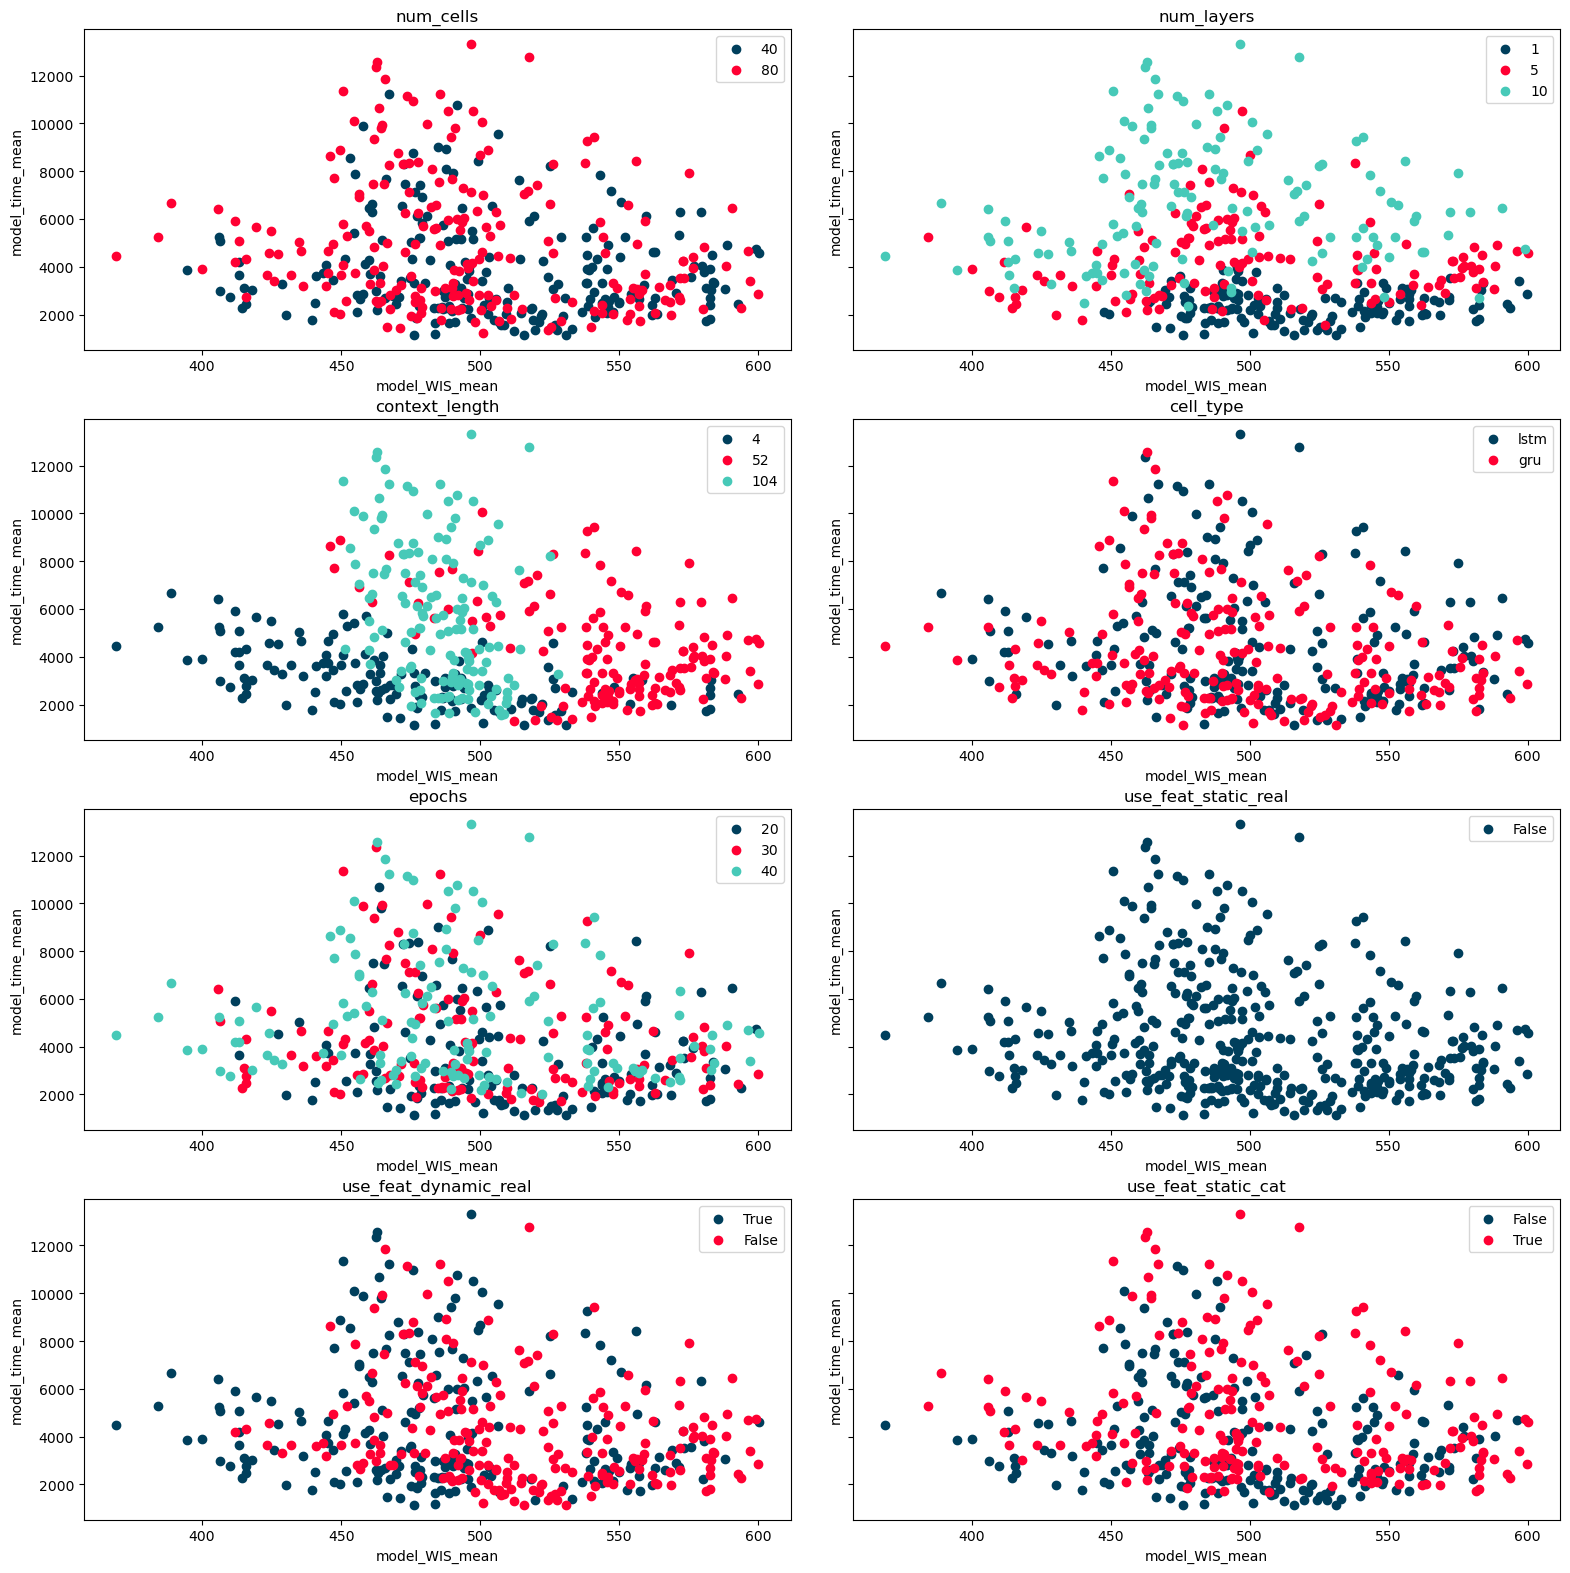

In [9]:
hp_color_plot(config, overall_df_26_04, hp_search_space_26_04, )

# 15.05

In [10]:
df_15_05 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/Hyperparameter_results_15_05.csv", sep=',')
hp_search_space_15_05 = {
    "num_cells": tune.grid_search([60, 140]),
    "num_layers": tune.grid_search([8, 10]),
    "context_length":tune.grid_search([2, 4, 8]),
    "cell_type":tune.grid_search(["lstm"]),
    "epochs":tune.grid_search([40, 60, 80]),
    "use_feat_static_real":tune.grid_search([True, False]),
    "use_feat_dynamic_real":tune.grid_search([True]),
    "use_feat_static_cat":tune.grid_search([False, True]),
    #"cardinality":tune.sample_from(lambda spec:[2]*411 if spec.config.use_feat_static_cat else None),
}
model_results_by_hp_15_05, overall_df_15_05 = generate_model_results_by_hp_dict(df_15_05, hp_search_space_15_05)

There are combinations with fewer modelRuns!!
                           total_modelruns  independent_combinations
modelruns_per_combination                                           
3.0                                    348                     116.0
2.0                                     52                      26.0
4.0                                      8                       2.0


In [11]:
display(overall_df_15_05.sort_values("model_WIS_mean")[added_cols+[col for col in df_15_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/cell_type,config/context_length,config/epochs,config/num_cells,config/num_layers,config/use_feat_dynamic_real,config/use_feat_static_cat,config/use_feat_static_real
369,353.904818,538.635779,23.208528,343.481900,6103.897740,31219.665348,176.690875,6013.249428,3.0,lstm,4,60,140,8,True,False,False
377,359.993085,1371.655148,37.035863,342.837765,3915.358529,32240.505170,179.556412,3891.109677,3.0,lstm,2,60,60,10,True,False,False
373,365.095499,421.850153,20.538991,372.100591,7238.603882,31243.197945,176.757455,7191.290450,3.0,lstm,8,80,140,8,True,False,False
87,369.778389,168.976250,12.999087,368.705670,6707.702162,136611.168147,369.609481,6903.313550,3.0,lstm,2,80,140,8,True,False,False
372,371.805984,1051.012690,32.419326,379.552842,6826.513456,104295.057437,322.947453,6842.736548,3.0,lstm,4,80,140,8,True,False,False
240,372.710682,531.782011,23.060399,383.672467,4694.712696,27360.085310,165.408843,4705.996361,3.0,lstm,2,80,60,10,True,False,False
396,375.036573,64.187875,8.011734,372.785558,4081.417745,16215.947498,127.341853,4020.038193,3.0,lstm,4,60,60,8,True,True,False
140,375.353511,20.337046,4.509661,375.353511,7555.711132,25794.369382,160.606256,7555.711132,2.0,lstm,8,60,140,10,True,True,False
279,375.576666,10.402138,3.225235,375.576666,6205.481035,75149.830607,274.134694,6205.481035,2.0,lstm,2,40,140,10,True,True,False
100,376.003237,578.534275,24.052739,377.376829,6072.392302,156091.024923,395.083567,6003.424447,3.0,lstm,4,40,140,10,True,False,False


144
408


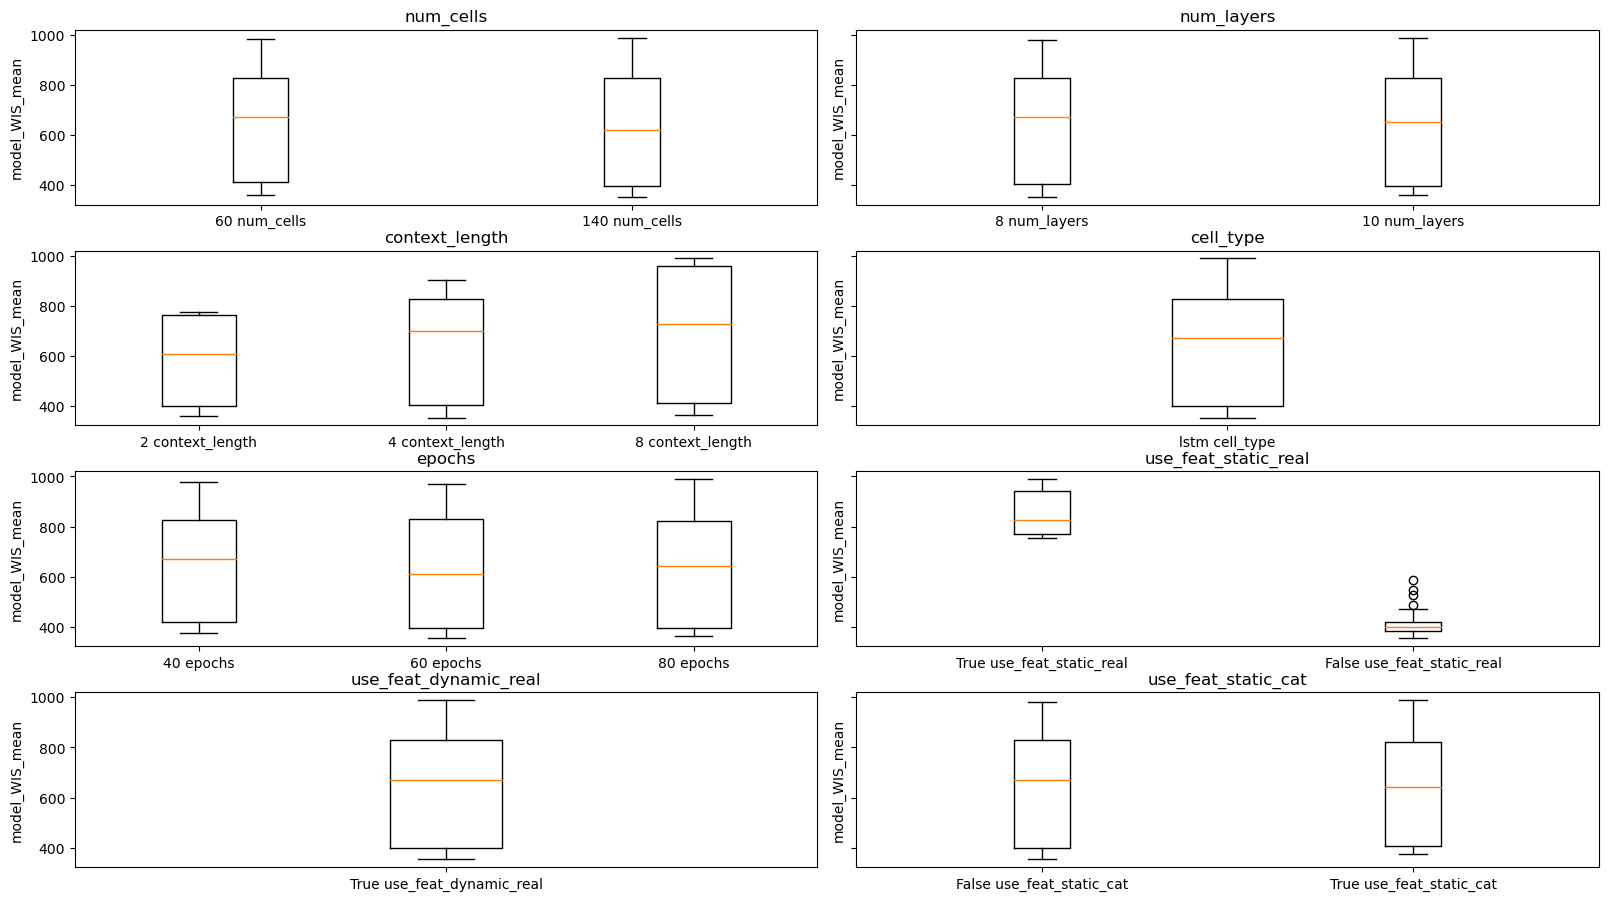

In [12]:
unique_df_15_05 = overall_df_15_05[added_cols+[col for col in df_15_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_15_05))
print(len(overall_df_15_05))
#hyperparameter_boxplots(unique_df_15_05, hp_search_space_15_05, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_15_05, hp_search_space_15_05, col="model_WIS_mean")

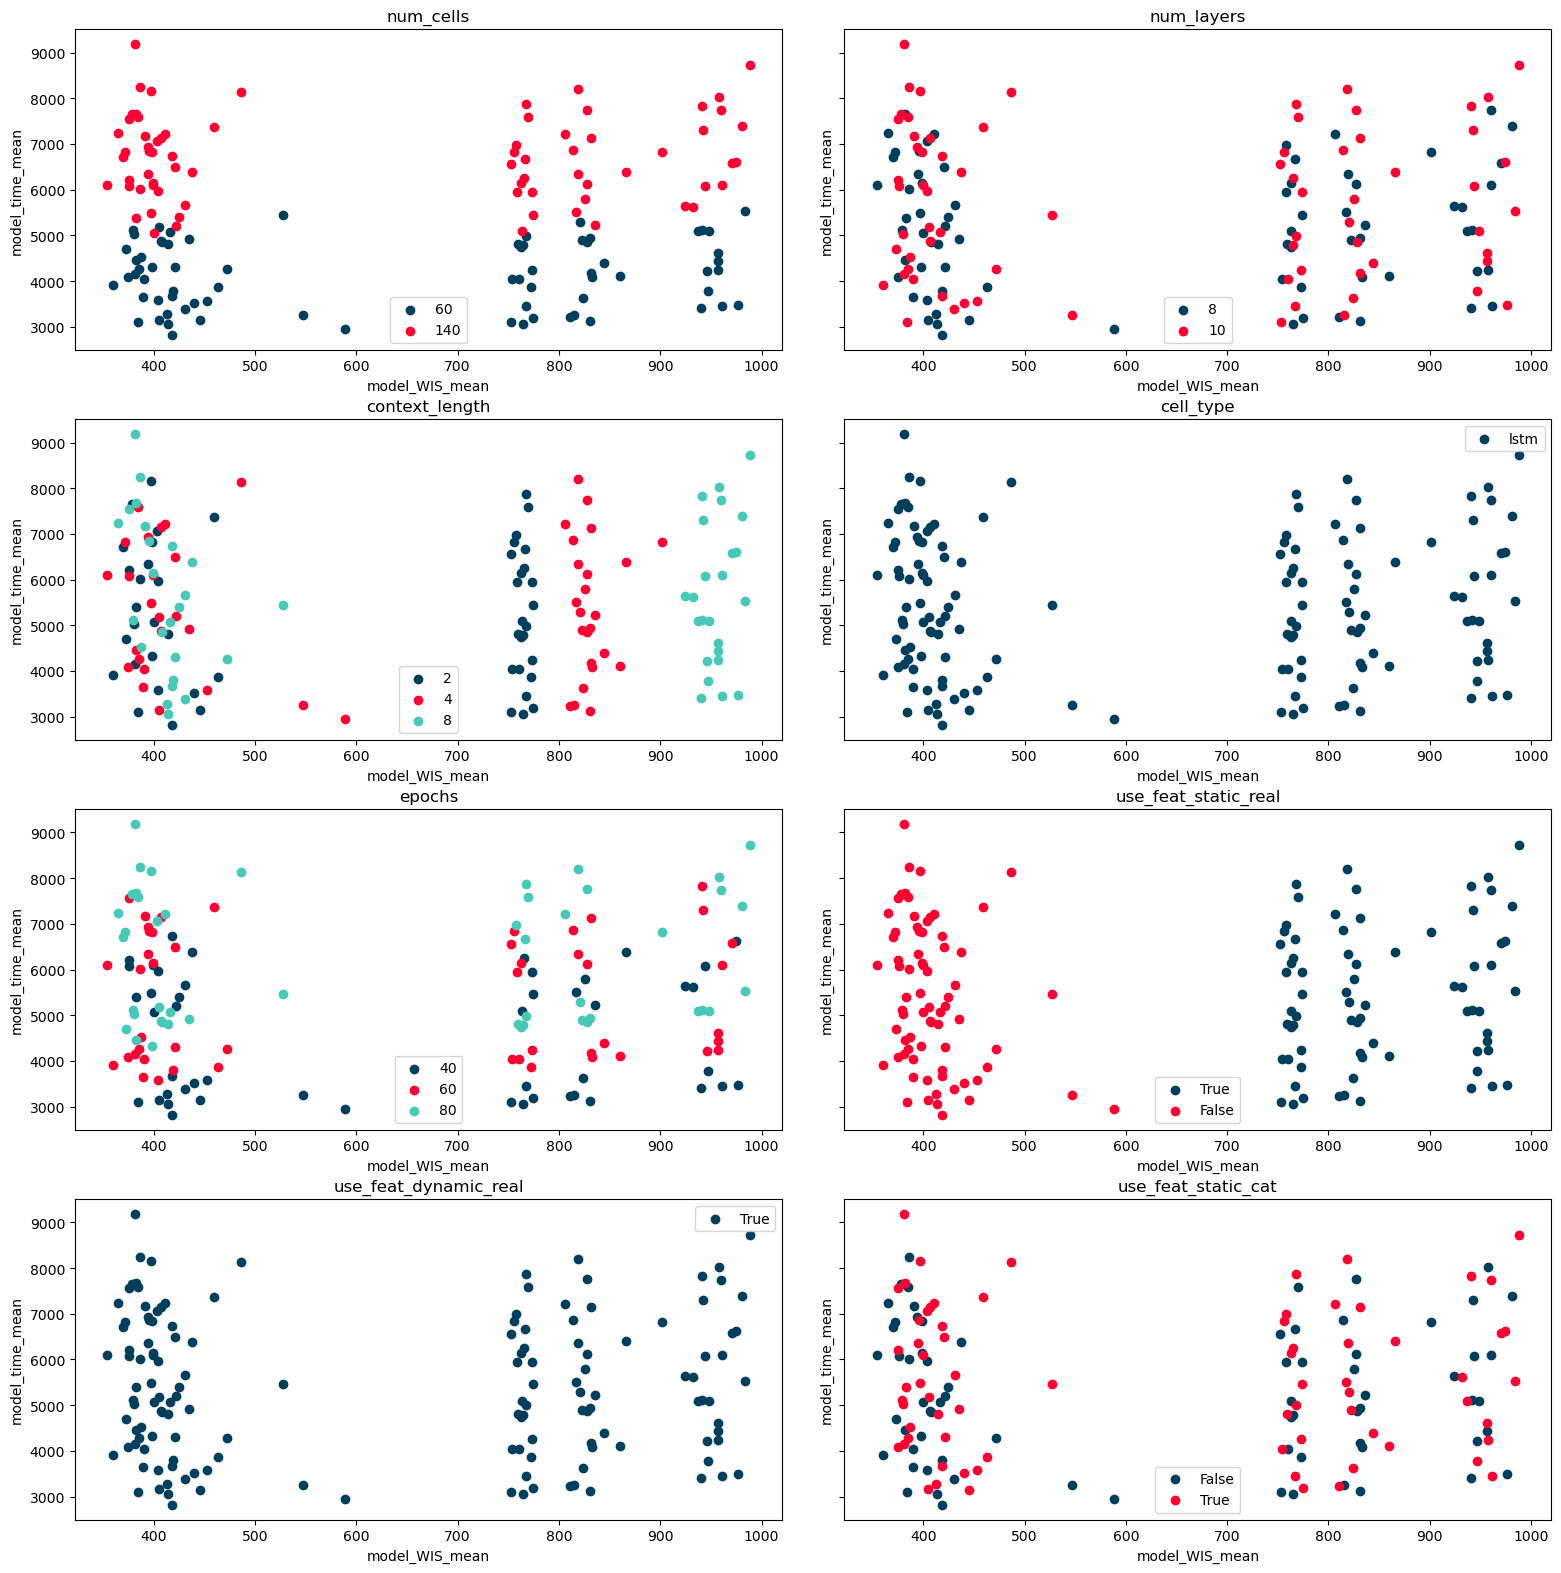

In [13]:
hp_color_plot(config, overall_df_15_05, hp_search_space_15_05, )

# 18.05

In [14]:
df_18_05 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/Hyperparameter_results_18_05.csv", sep=',')
hp_search_space_18_05 = {
    "num_cells": tune.grid_search([10, 60, 140]),
    "num_layers": tune.grid_search([6, 12]),
    "context_length":tune.grid_search([1, 2, 4]),
    "cell_type":tune.grid_search(["lstm"]),
    "epochs":tune.grid_search([140, 200, 90]),
    "use_feat_static_real":tune.grid_search([False]),
    "use_feat_dynamic_real":tune.grid_search([True]),
    "use_feat_static_cat":tune.grid_search([False]),
    #"cardinality":tune.sample_from(lambda spec:[2]*411 if spec.config.use_feat_static_cat else None),
}
model_results_by_hp_18_05, overall_df_18_05 = generate_model_results_by_hp_dict(df_18_05, hp_search_space_18_05)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
6.0                                    324                      54.0


In [15]:
display(overall_df_18_05.sort_values("model_WIS_mean")[added_cols+[col for col in df_18_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/cell_type,config/context_length,config/epochs,config/num_cells,config/num_layers,config/use_feat_dynamic_real,config/use_feat_static_cat,config/use_feat_static_real
293,360.596472,42.867122,6.547299,358.253332,4631.463597,1.266548e+06,1125.410366,4137.278250,6.0,lstm,4,140,140,6,True,False,False
283,361.839229,176.992662,13.303859,360.716206,2039.454706,1.344591e+04,115.956496,1997.549978,6.0,lstm,2,140,60,6,True,False,False
22,361.925651,274.596384,16.570950,358.298820,4314.768386,9.278283e+05,963.238434,3882.836503,6.0,lstm,2,140,140,6,True,False,False
268,363.639691,356.256038,18.874746,358.257112,8257.834956,2.610251e+06,1615.627193,7651.217725,6.0,lstm,2,200,140,12,True,False,False
9,365.411718,199.051394,14.108557,366.093989,1641.823804,2.191135e+04,148.024826,1575.652031,6.0,lstm,1,90,60,6,True,False,False
296,365.643125,240.690959,15.514218,368.757152,5505.397182,1.812376e+06,1346.245045,4825.156097,6.0,lstm,4,200,140,6,True,False,False
79,365.823612,111.987943,10.582436,362.474429,5171.700238,2.437451e+06,1561.233917,4445.880442,6.0,lstm,2,200,140,6,True,False,False
232,366.791319,44.251663,6.652192,366.517338,2532.489722,2.625739e+04,162.041309,2446.540952,6.0,lstm,2,200,60,6,True,False,False
182,367.060383,327.433422,18.095122,368.810853,3687.457359,2.711809e+05,520.750363,3445.691173,6.0,lstm,4,90,140,6,True,False,False
174,369.436565,132.060831,11.491772,373.578128,1966.928357,1.172498e+04,108.281962,1927.113675,6.0,lstm,1,140,60,6,True,False,False


54
324


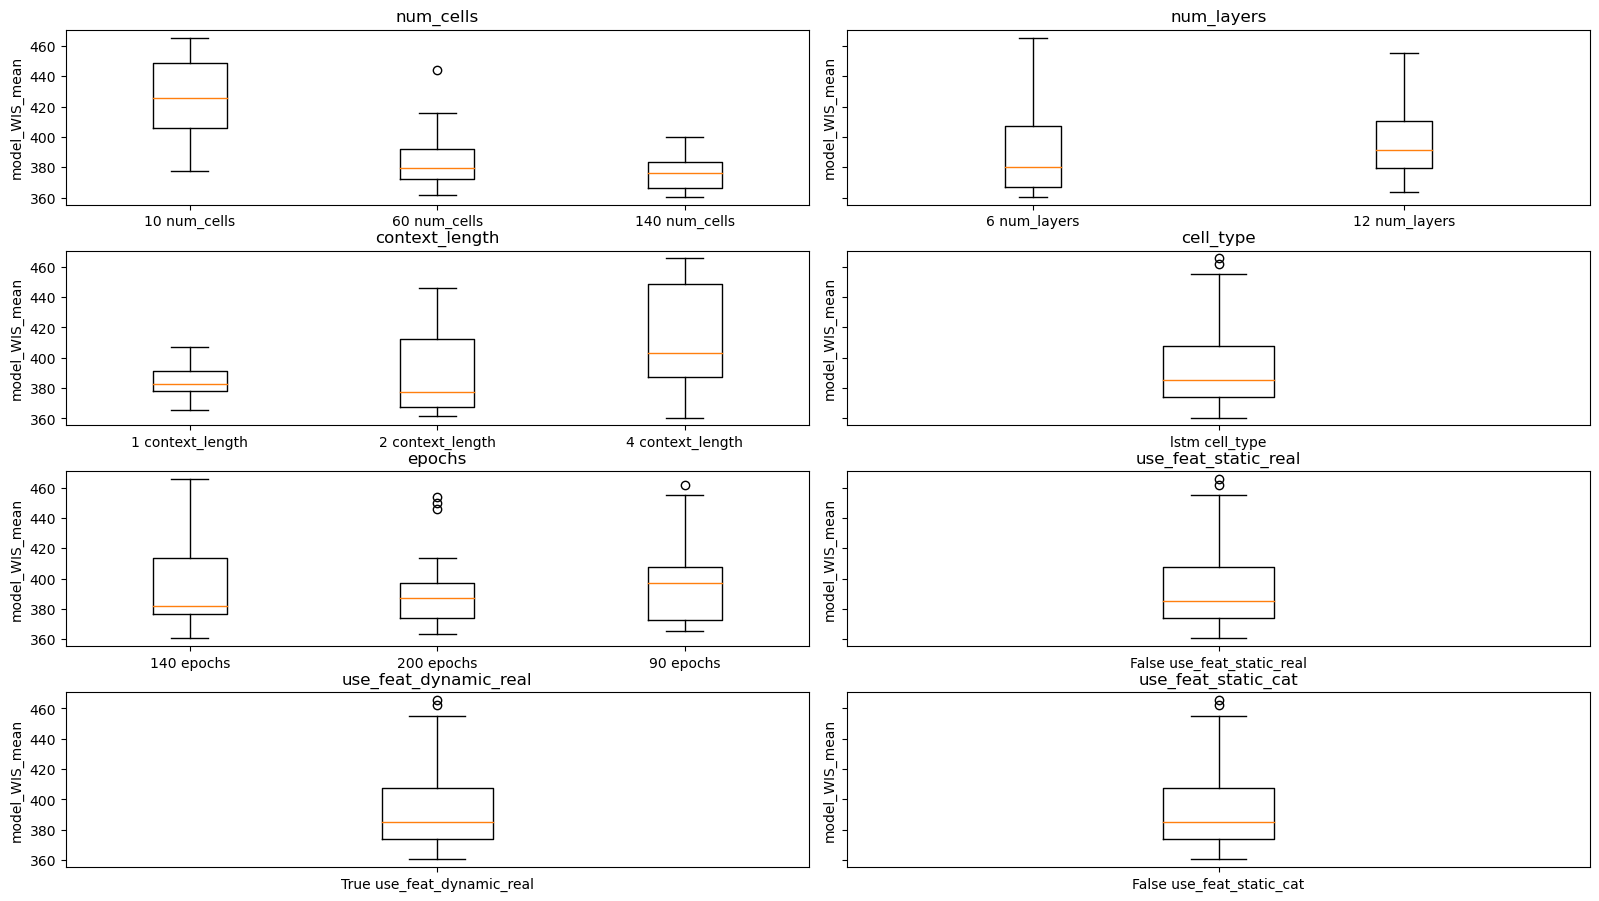

In [16]:
unique_df_18_05 = overall_df_18_05[added_cols+[col for col in df_18_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_18_05))
print(len(overall_df_18_05))
#hyperparameter_boxplots(unique_df_18_05, hp_search_space_18_05, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_18_05, hp_search_space_18_05, col="model_WIS_mean")

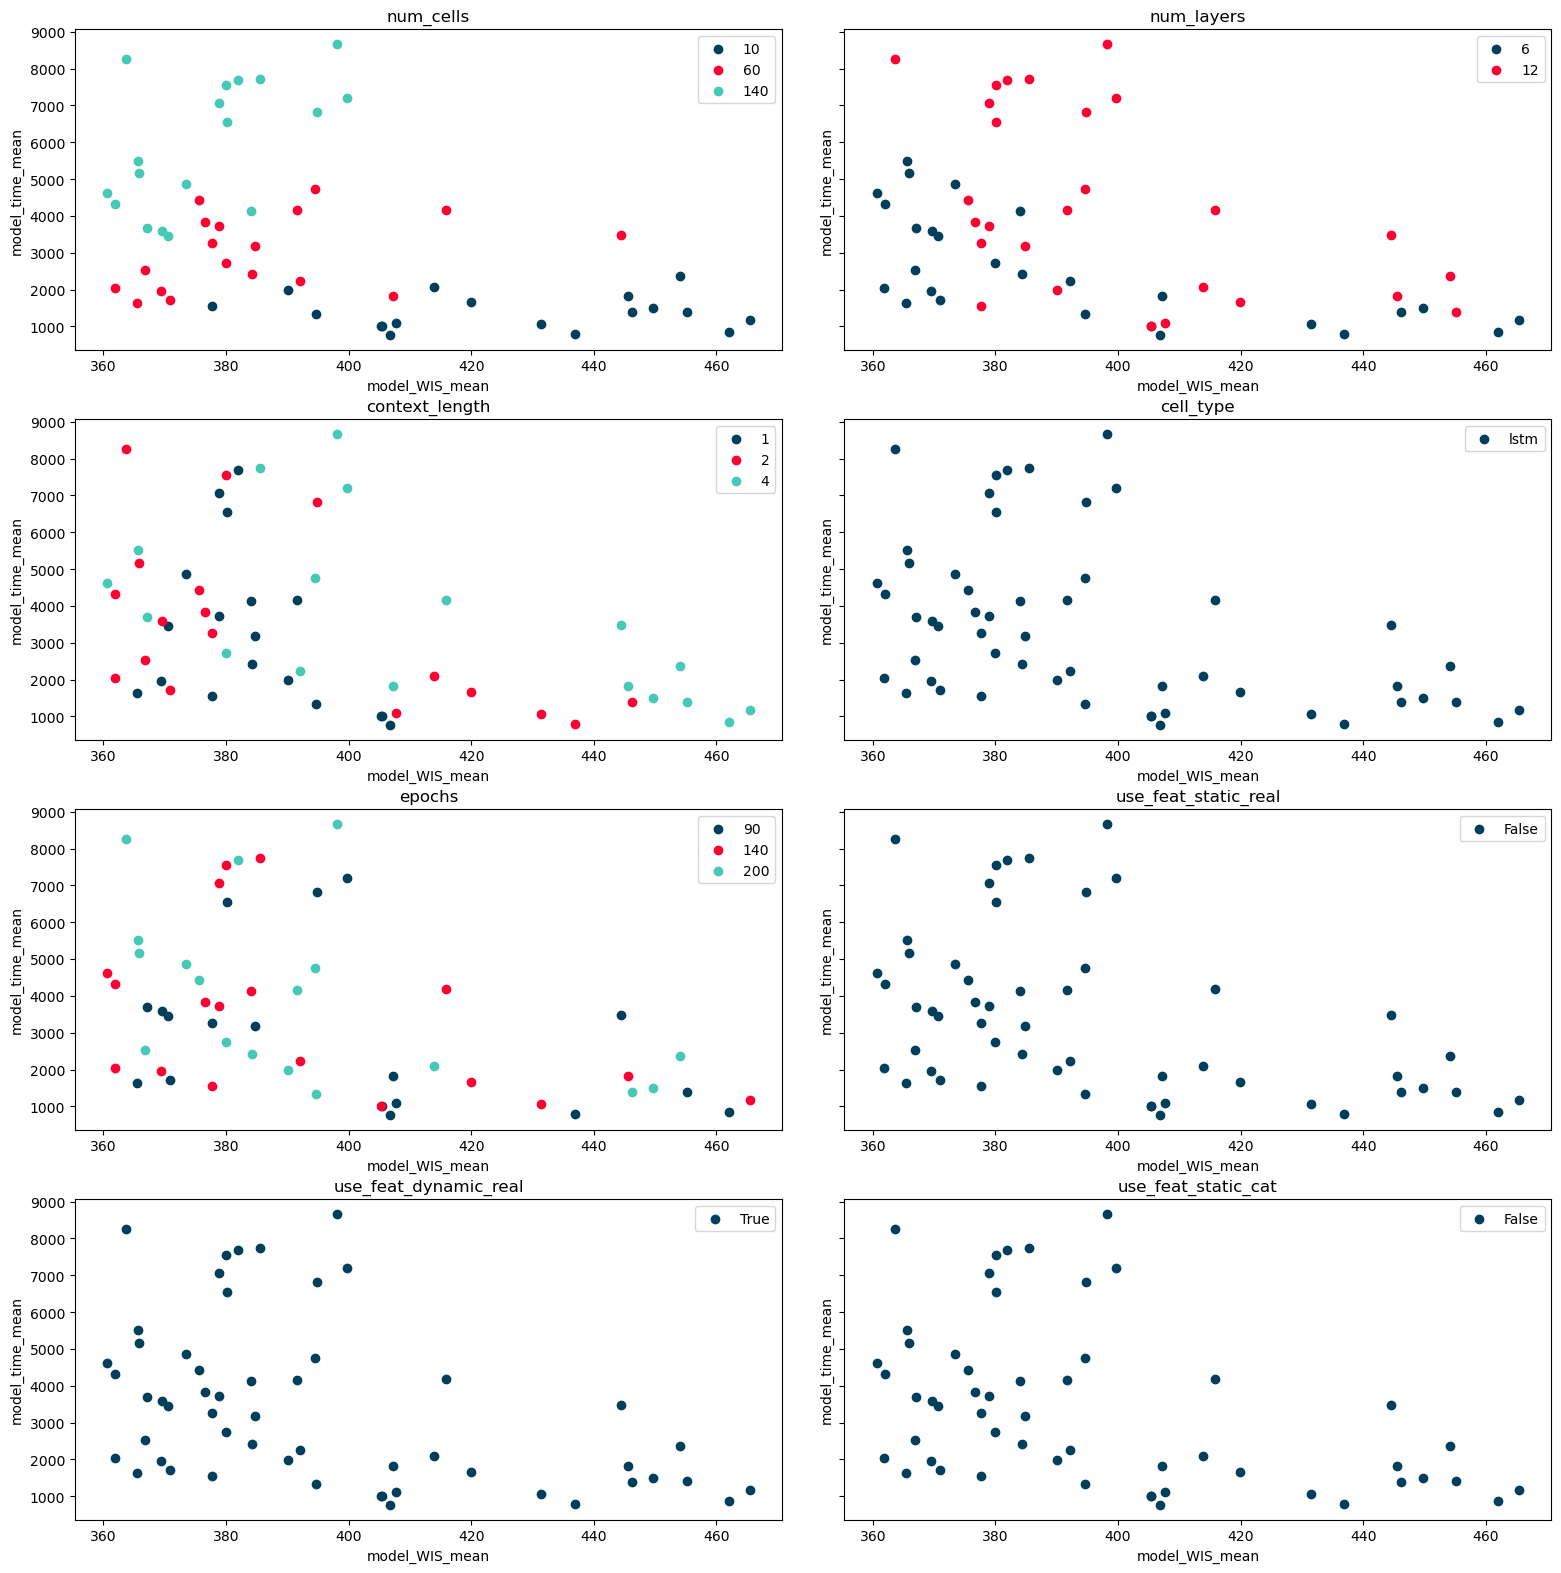

In [17]:
hp_color_plot(config, overall_df_18_05, hp_search_space_18_05, )

# 22.05

In [18]:
df_22_05 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/Hyperparameter_results_22_05.csv", sep=',')
hp_search_space_22_05 =  {
    "num_cells": tune.grid_search([10, 60, 140]),
    "num_layers": tune.grid_search([6, 12]),
    "context_length":tune.grid_search([1, 2, 4]),
    "cell_type":tune.grid_search(["lstm"]),
    "epochs":tune.grid_search([140, 200, 90]),
    "use_feat_static_real":tune.grid_search([False]),
    "use_feat_dynamic_real":tune.grid_search([True]),
    "use_feat_static_cat":tune.grid_search([False]),
    #"cardinality":tune.sample_from(lambda spec:[2]*411 if spec.config.use_feat_static_cat else None),
}
model_results_by_hp_22_05, overall_df_22_05 = generate_model_results_by_hp_dict(df_22_05, hp_search_space_22_05)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                    270                      54.0


In [19]:
display(overall_df_22_05.sort_values("model_WIS_mean")[added_cols+[col for col in df_22_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/cell_type,config/context_length,config/epochs,config/num_cells,config/num_layers,config/use_feat_dynamic_real,config/use_feat_static_cat,config/use_feat_static_real
133,352.982640,34.791733,5.898452,353.110258,4436.703189,5240.835330,72.393614,4445.307727,5.0,lstm,2,200,140,6,True,False,False
19,357.679510,328.709586,18.130350,357.059406,3320.696718,8136.581519,90.203002,3374.560258,5.0,lstm,2,90,140,6,True,False,False
184,358.858485,117.185905,10.825244,360.743826,3843.268781,11204.882472,105.853117,3890.070355,5.0,lstm,2,140,140,6,True,False,False
16,360.682244,55.454657,7.446788,360.004162,2445.793537,705.289788,26.557293,2455.513743,5.0,lstm,2,200,60,6,True,False,False
52,361.620819,149.627195,12.232220,362.282538,7273.199446,69471.619730,263.574695,7279.973231,5.0,lstm,2,200,140,12,True,False,False
134,363.047112,183.124592,13.532354,355.672085,4794.713404,18183.630143,134.846691,4832.220718,5.0,lstm,4,200,140,6,True,False,False
185,364.105680,264.461761,16.262280,357.815919,4124.975469,19470.172134,139.535559,4167.003407,5.0,lstm,4,140,140,6,True,False,False
215,364.301014,634.193523,25.183199,362.720768,7981.863548,133448.458981,365.305980,8009.218266,5.0,lstm,4,200,140,12,True,False,False
128,364.746503,527.067728,22.957956,364.463908,3514.744765,10695.807665,103.420538,3515.233595,5.0,lstm,4,90,140,6,True,False,False
157,370.234010,218.399318,14.778339,363.995255,6752.176046,27819.365533,166.791383,6813.735701,5.0,lstm,2,140,140,12,True,False,False


54
270


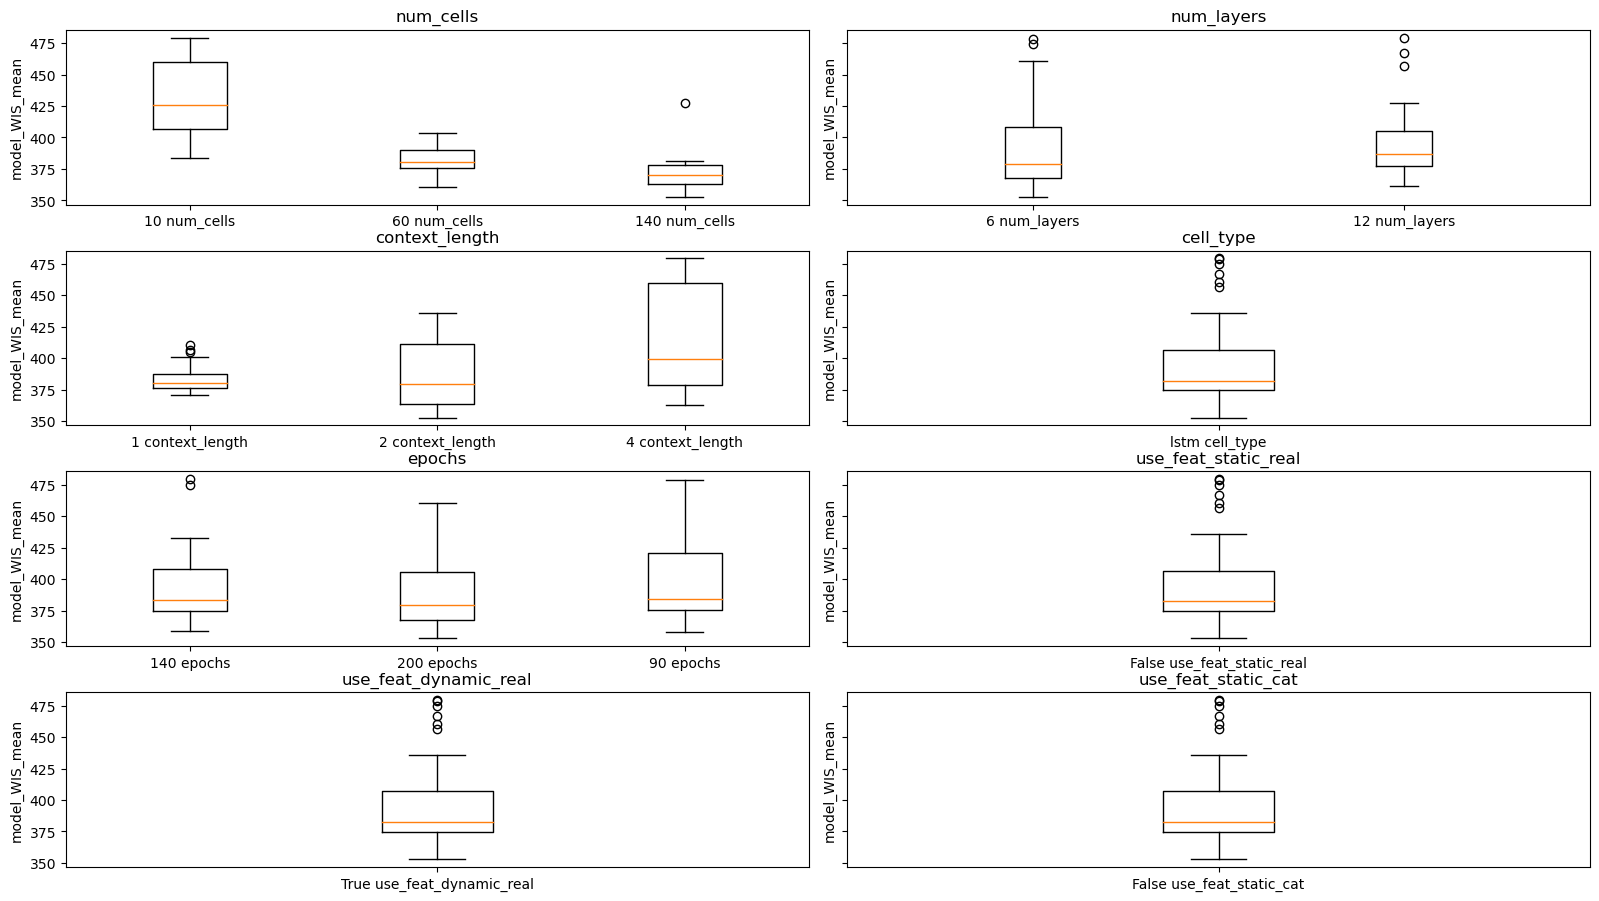

In [20]:
unique_df_22_05 = overall_df_22_05[added_cols+[col for col in df_22_05.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_22_05))
print(len(overall_df_22_05))
#hyperparameter_boxplots(unique_df_31_05_01, hp_search_space_31_05_01, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_22_05, hp_search_space_22_05, col="model_WIS_mean")

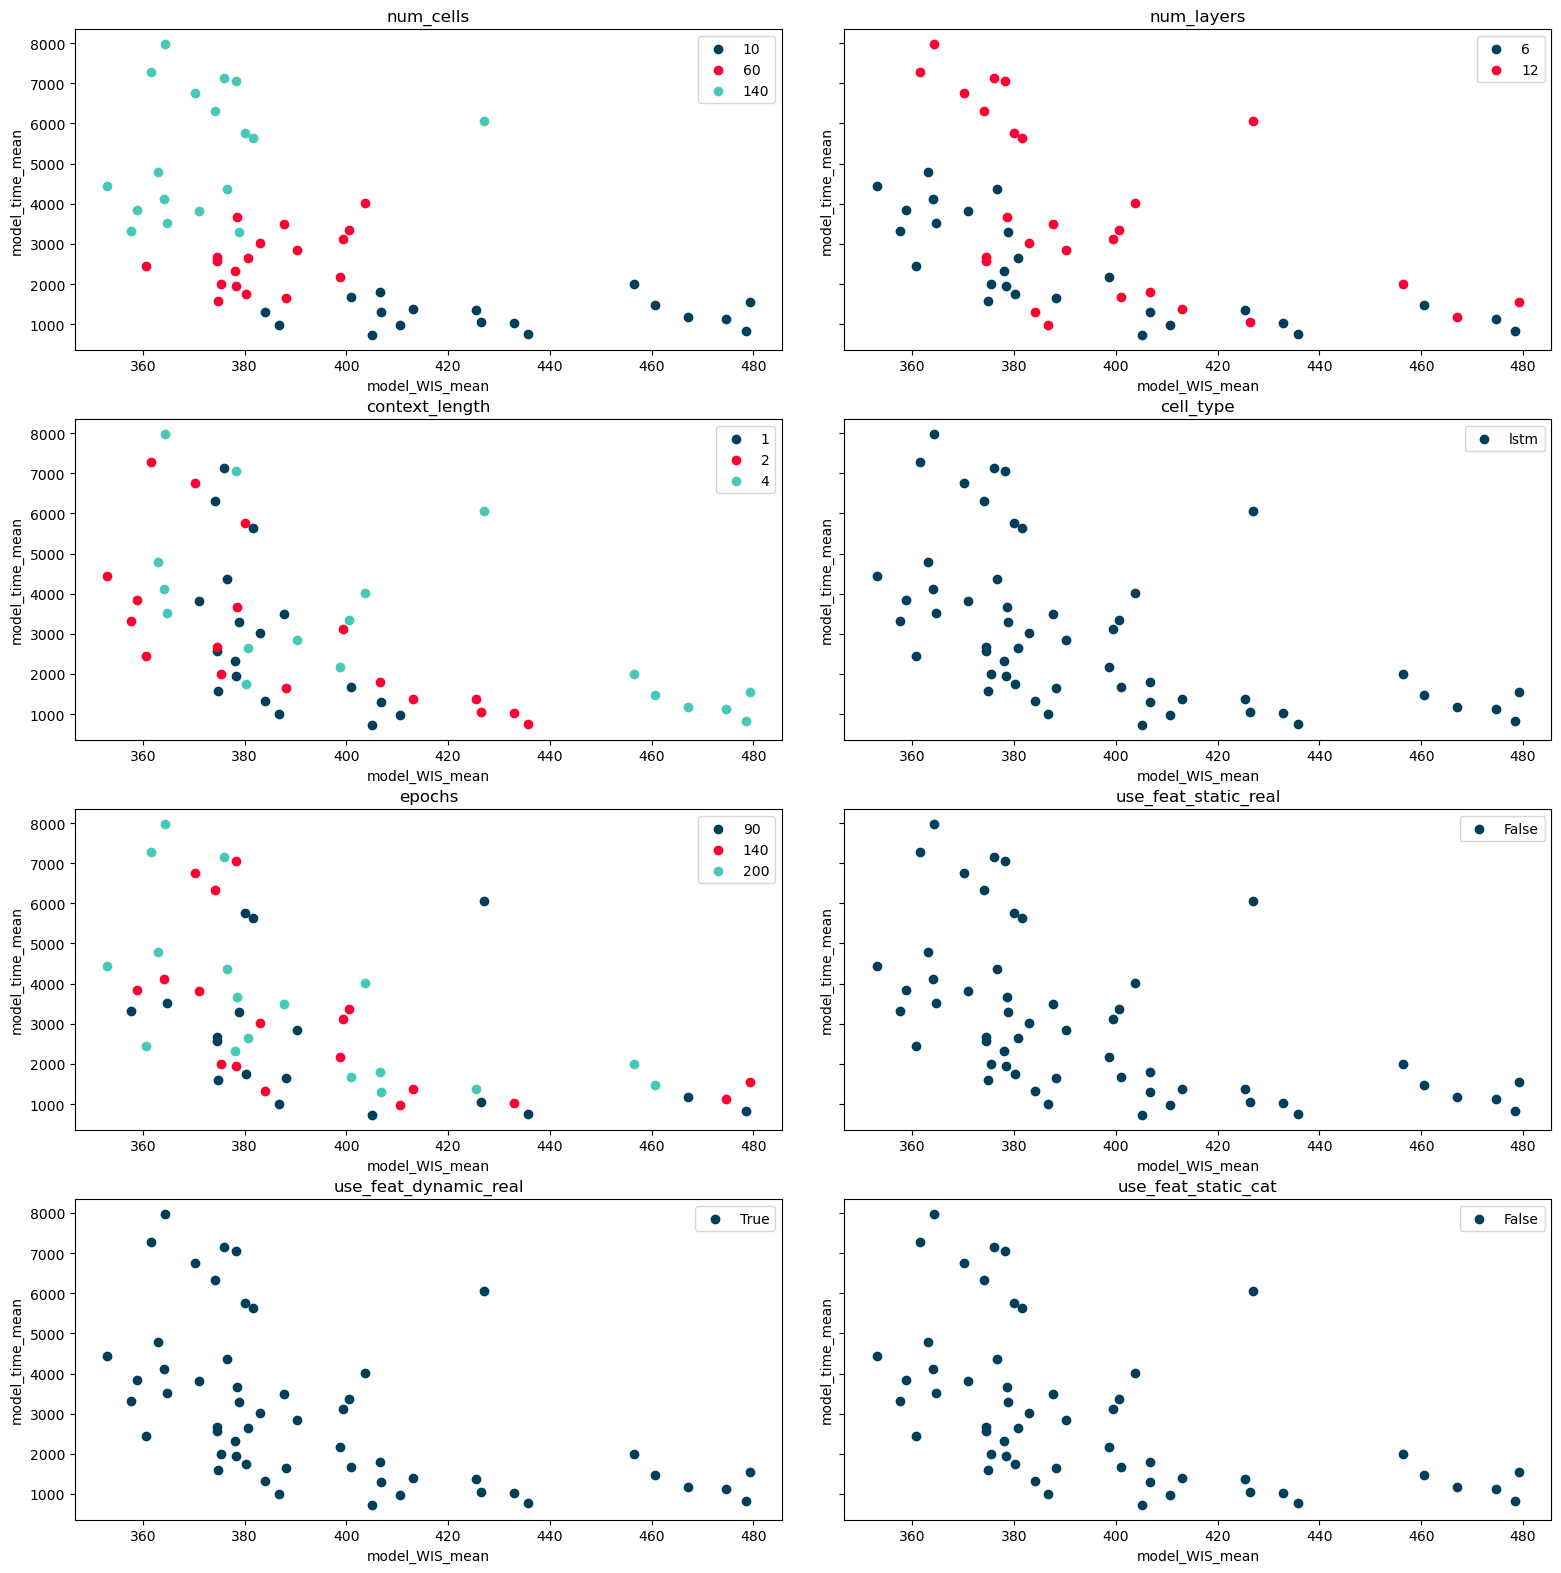

In [21]:
hp_color_plot(config, overall_df_22_05, hp_search_space_22_05, )

# 03.06

In [18]:
df_03_06 = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/HyperparameterFiles/Hyperparameter_results_03_06.csv", sep=',')
hp_search_space_03_06 = {
    "num_cells": tune.grid_search([80, 140]),
    "num_layers": tune.grid_search([6, 8, 10]),
    "context_length":tune.grid_search([1, 2, 104]),
    "cell_type":tune.grid_search(["lstm"]),
    "epochs":tune.grid_search([140, 160, 200]),
    "use_feat_static_real":tune.grid_search([False]),
    "use_feat_dynamic_real":tune.grid_search([True]),
    "use_feat_static_cat":tune.grid_search([False]),
    "cardinality":tune.sample_from(lambda spec:[2]*411 if spec.config.use_feat_static_cat else None),
}
model_results_by_hp_03_06, overall_df_03_06 = generate_model_results_by_hp_dict(df_03_06, hp_search_space_03_06)

                           total_modelruns  independent_combinations
modelruns_per_combination                                           
5.0                                    270                      54.0


In [19]:
display(overall_df_03_06.sort_values("model_WIS_mean")[added_cols+[col for col in df_03_06.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates().head(20))

,model_WIS_mean,model_WIS_variance,model_WIS_sd,model_WIS_median,model_time_mean,model_time_variance,model_time_sd,model_time_median,shape,config/cell_type,config/context_length,config/epochs,config/num_cells,config/num_layers,config/use_feat_dynamic_real,config/use_feat_static_cat,config/use_feat_static_real
133,352.982640,34.791733,5.898452,353.110258,4436.703189,5240.835330,72.393614,4445.307727,5.0,lstm,2,200,140,6,True,False,False
19,357.679510,328.709586,18.130350,357.059406,3320.696718,8136.581519,90.203002,3374.560258,5.0,lstm,2,90,140,6,True,False,False
184,358.858485,117.185905,10.825244,360.743826,3843.268781,11204.882472,105.853117,3890.070355,5.0,lstm,2,140,140,6,True,False,False
16,360.682244,55.454657,7.446788,360.004162,2445.793537,705.289788,26.557293,2455.513743,5.0,lstm,2,200,60,6,True,False,False
52,361.620819,149.627195,12.232220,362.282538,7273.199446,69471.619730,263.574695,7279.973231,5.0,lstm,2,200,140,12,True,False,False
134,363.047112,183.124592,13.532354,355.672085,4794.713404,18183.630143,134.846691,4832.220718,5.0,lstm,4,200,140,6,True,False,False
185,364.105680,264.461761,16.262280,357.815919,4124.975469,19470.172134,139.535559,4167.003407,5.0,lstm,4,140,140,6,True,False,False
215,364.301014,634.193523,25.183199,362.720768,7981.863548,133448.458981,365.305980,8009.218266,5.0,lstm,4,200,140,12,True,False,False
128,364.746503,527.067728,22.957956,364.463908,3514.744765,10695.807665,103.420538,3515.233595,5.0,lstm,4,90,140,6,True,False,False
157,370.234010,218.399318,14.778339,363.995255,6752.176046,27819.365533,166.791383,6813.735701,5.0,lstm,2,140,140,12,True,False,False


54
270


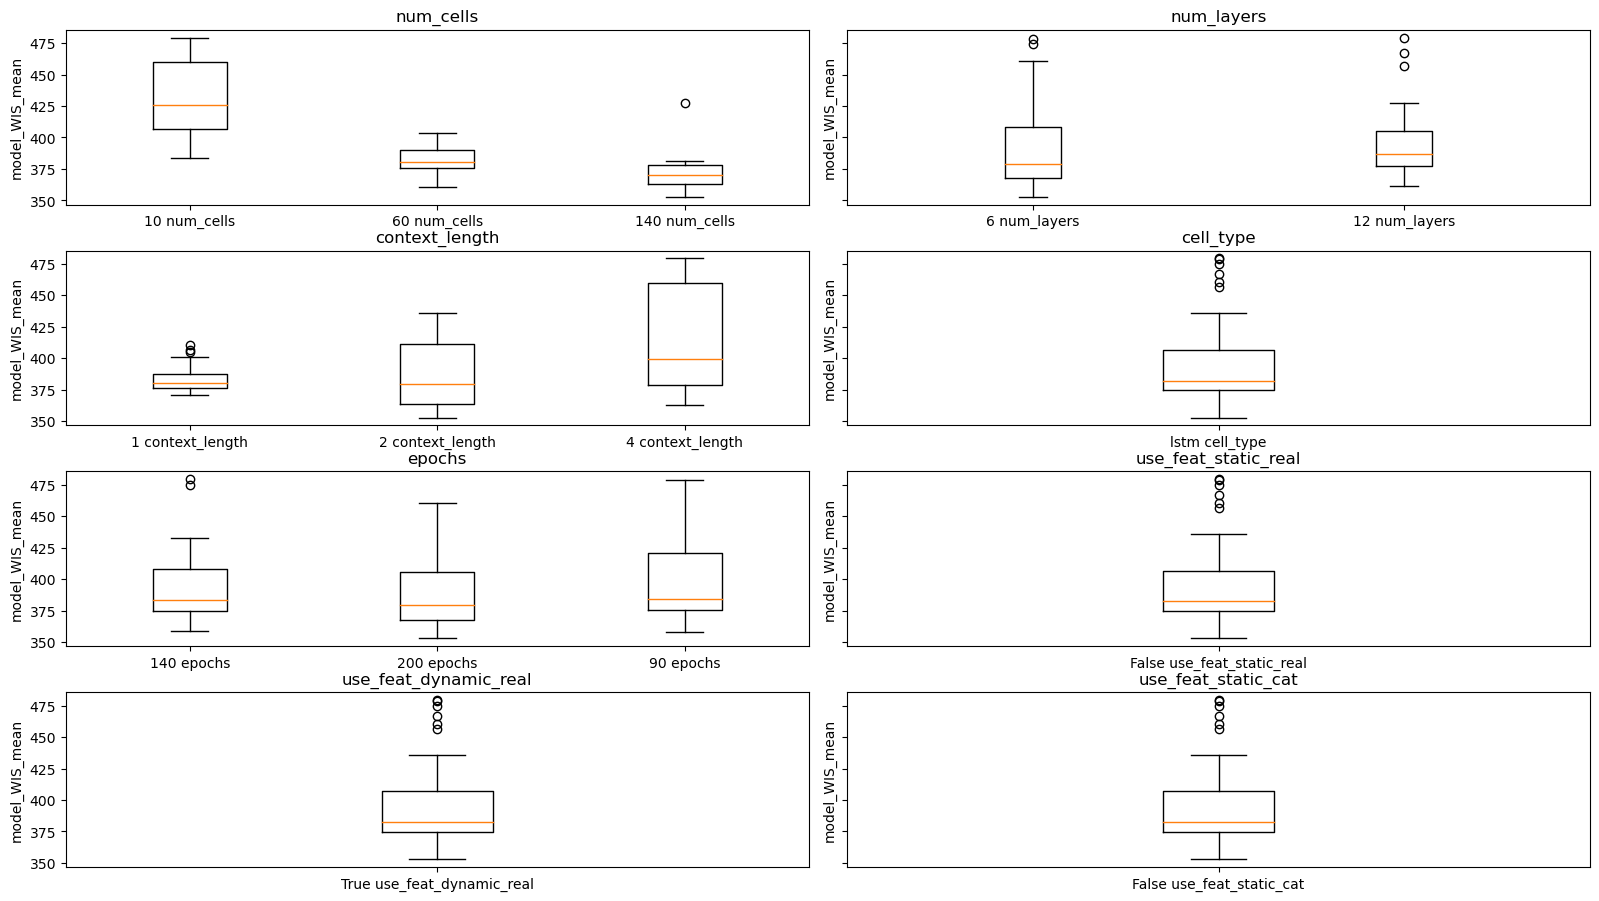

In [20]:
unique_df_03_06 = overall_df_03_06[added_cols+[col for col in df_03_06.columns if ("config" in col)&("cardinality" not in col)]].drop_duplicates()
print(len(unique_df_03_06))
print(len(overall_df_03_06))
#hyperparameter_boxplots(unique_df_31_05_01, hp_search_space_31_05_01, col="model_WIS_variance")
#print("________________")
hyperparameter_boxplots(unique_df_03_06, hp_search_space_03_06, col="model_WIS_mean")

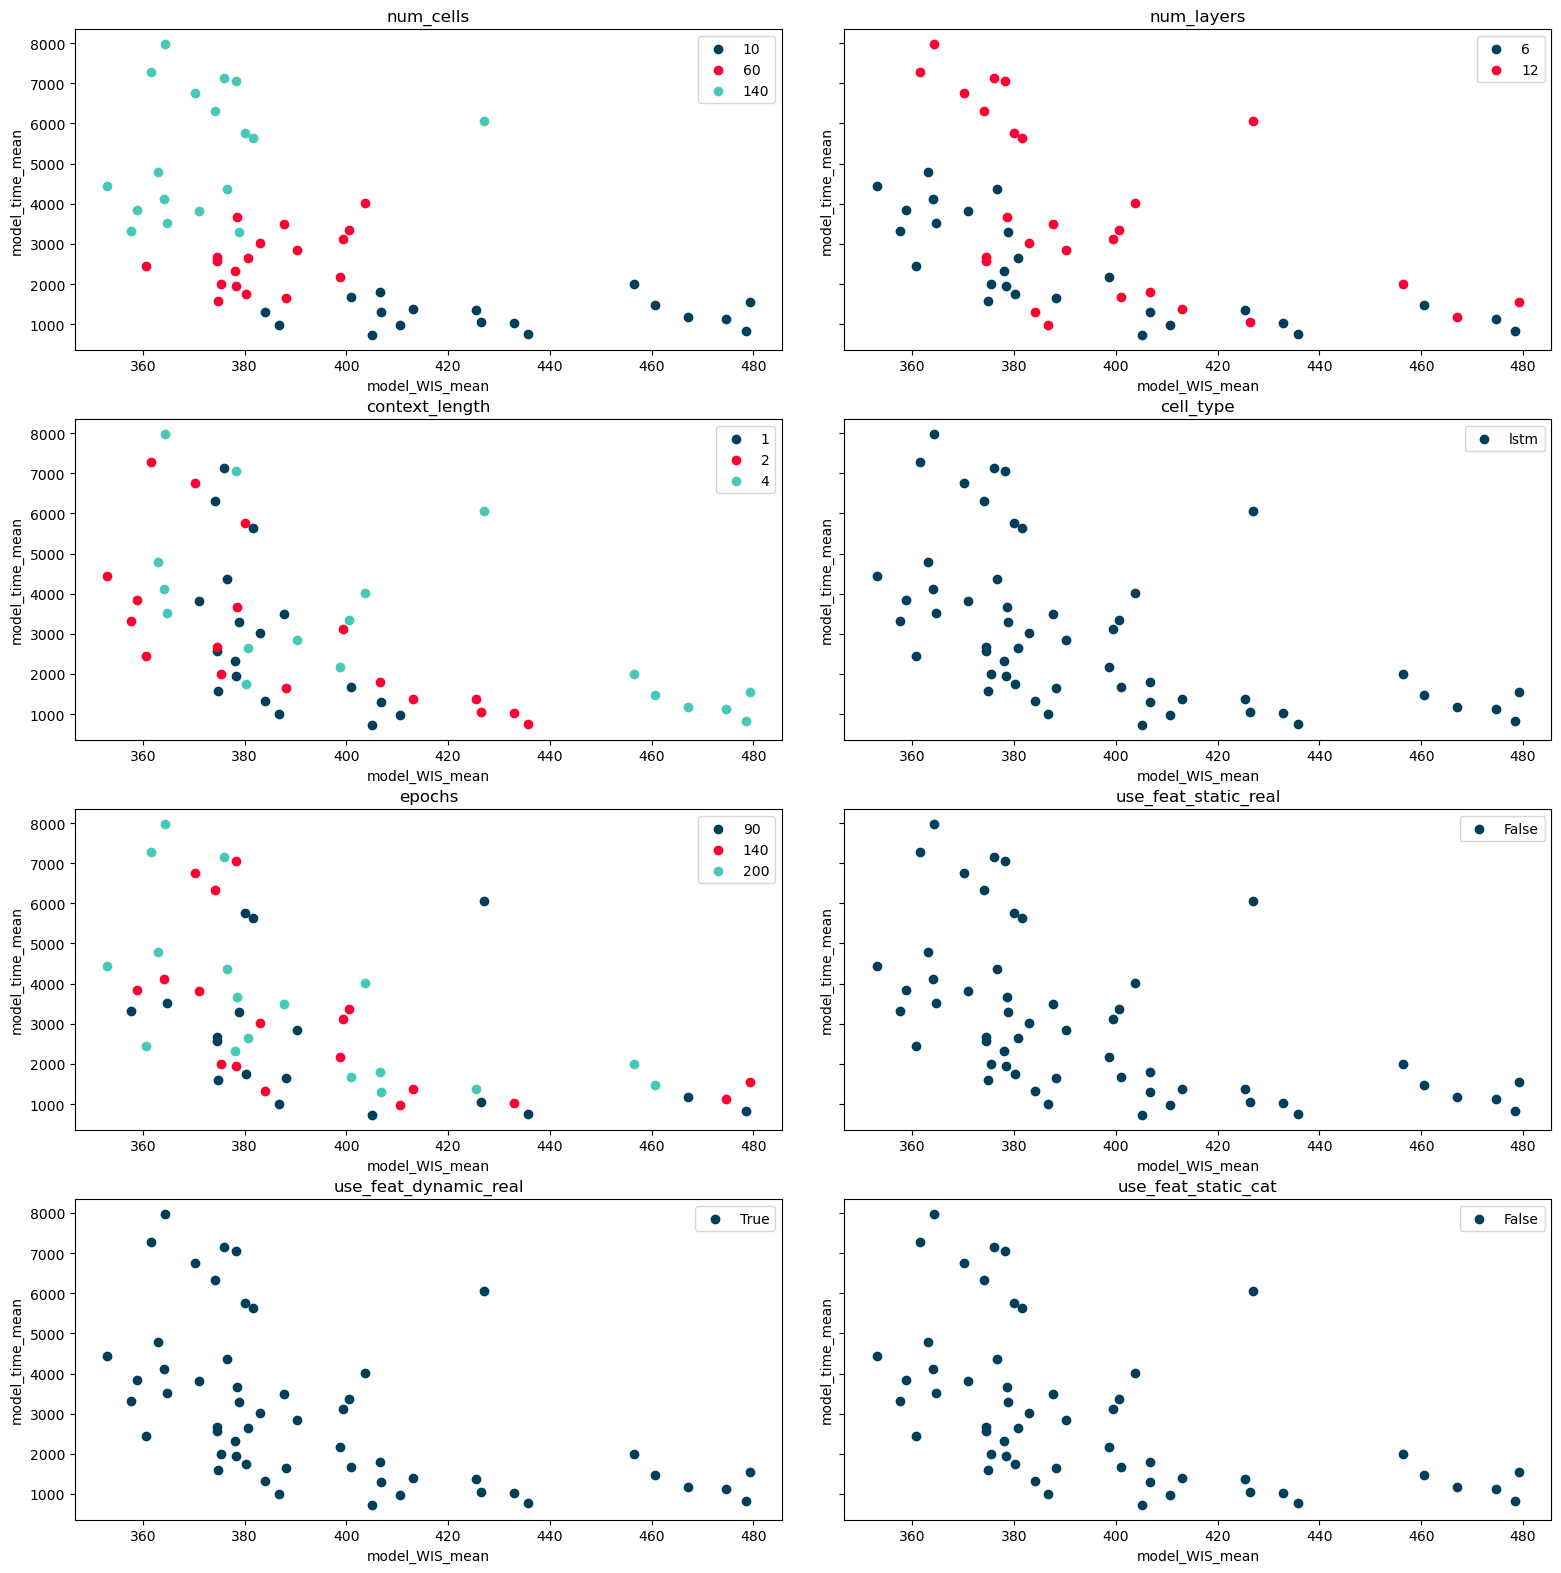

In [21]:
hp_color_plot(config, overall_df_03_06, hp_search_space_03_06, )